# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [1]:
import nltk
nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer


     |████████████████████████████████| 79 kB 5.0 MB/s 
     |████████████████████████████████| 3.5 MB 24.6 MB/s 
     |████████████████████████████████| 1.2 MB 37.9 MB/s 
     |████████████████████████████████| 67 kB 2.7 MB/s 
     |████████████████████████████████| 596 kB 34.1 MB/s 
     |████████████████████████████████| 6.8 MB 34.0 MB/s 
     |████████████████████████████████| 895 kB 11.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=bc994d522791d9c7974e4a68eb81ec3ed85270968679a286da1705363fb8f50f
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [3]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

# print(list(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

# print(list(newsgroups_train.target_names))
#print(newsgroups_train.keys())

In [4]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
#preprocessing of sentences and the article

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_punct(remove_urls(sentence))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", '')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences



In [6]:

def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)

  return review_embedding




In [7]:
X, y = np.array(newsgroups_train['data']), np.array(newsgroups_train['target'])

In [8]:
X_processed = []
for i in range(len(X)):
  X_processed.append(get_review_embedding(X[i]))

In [9]:
# data visualization 

# Try to visualise the points from all the domains and try to visualise them 
# hint: you can use PCA 

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt




# K_Means Algorithm


Text(0, 0.5, 'Kmeans Score')

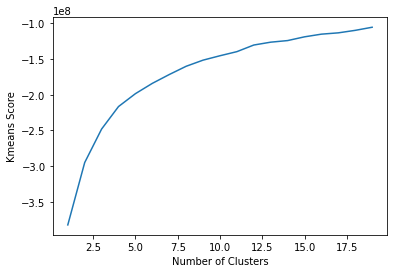

In [30]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA



kmeans_scores = []
distortions = [] #Elbow Method
sillhoute_scores = [] # Silhoutte Scores Calculation
for i in range(2, len(set(y[:100]))+1):
  kmeans = KMeans(n_clusters=i, random_state=4)
  kmeans.fit(X_processed)
  distortions.append(sum(np.min(cdist(np.array(X_processed), kmeans.cluster_centers_,'seuclidean'), axis=1)) / np.array(X_processed).shape[0])
  kmeans_scores.append(kmeans.score(X_processed))
  sillhoute_scores.append(silhouette_score(X_processed, kmeans.labels_))

plt.plot([i for i in range(1,len(distortions)+1)], kmeans_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Kmeans Score')

In [31]:
#PCA
pca = PCA(n_components=2)
pca.fit(X_processed)
x_splitted = pca.transform(X_processed)
#print(len(X_processed[0]))
x_splitted.shape

(11314, 2)

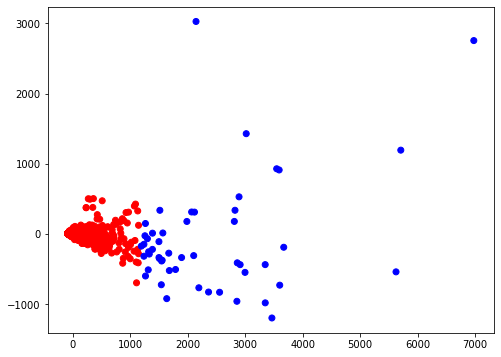

In [39]:
#code for visualisation of clusters
kmeans = KMeans(n_clusters=2, random_state=4)
kmeans.fit(X_processed)
LABEL_COLOR_MAP = {0: 'r',
                   1: 'b'}
plt.figure(figsize=(8,6))
label_color = [LABEL_COLOR_MAP[l] for l in kmeans.labels_]                                
plot = plt.scatter(x_splitted[:,0],x_splitted[:,1],color = label_color)

# Elbow method



*   Try to understand how elbow method works
*   Plot the graph between average distance and the number of clusters
*   Use elbow method to find the optimal number of clusters, 







Optimal Clusters by Elbow Method: 2


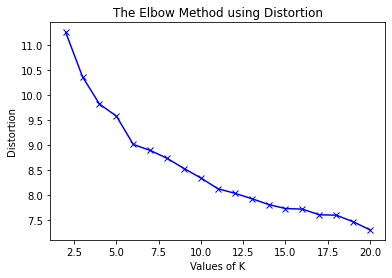

In [33]:
def elbow_method():
  K = [i for i in range(2, len(distortions)+2)]
  max = 0
  max_i = 0
  for i in range(len(distortions)-1):
    if(distortions[i]/distortions[i+1] > max):
      max = distortions[i]/distortions[i+1]
      max_i = i+2
  print("Optimal Clusters by Elbow Method:", max_i)
  plt.plot(K, distortions, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Average Distance')
  plt.title('The Elbow Method using Distortion')
  plt.show()

elbow_method()

# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




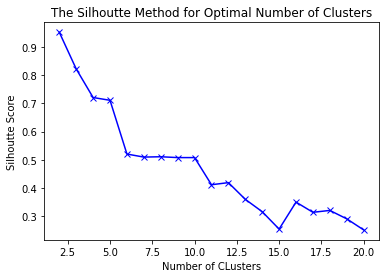

In [34]:
def silhouette_score():
  K = [i for i in range(2, len(sillhoute_scores)+2)]
  plt.plot(K, sillhoute_scores, 'bx-')
  plt.xlabel('Number of CLusters')
  plt.ylabel('Silhoutte Score')
  plt.title('The Silhoutte Method for Optimal Number of Clusters')
  plt.show()

silhouette_score()

# Agglomerative clustering

In [35]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import AgglomerativeClustering

def agglomerativeClustering():
  clustering = AgglomerativeClustering().fit(x_splitted)
  return clustering.labels_

agglomerative_labels = agglomerativeClustering()

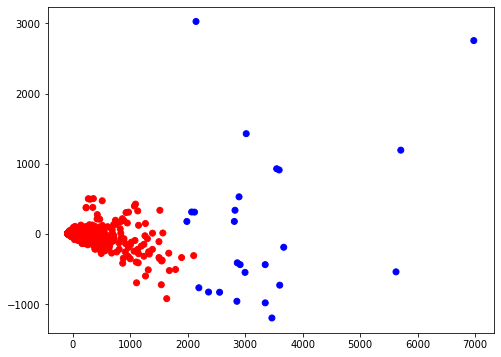

In [38]:
#code for visualisation of clusters
LABEL_COLOR_MAP = {0: 'r',
                   1: 'b'}
plt.figure(figsize=(8,6))
label_color = [LABEL_COLOR_MAP[l] for l in agglomerative_labels]                                
plot = plt.scatter(x_splitted[:,0],x_splitted[:,1],color = label_color)


# Dendogram


*   Try to understand the difference between agglomerative clustering and hierarchical clustering
*   Plot dendograms for both kinds of clustering
*   Find the optimal number of clusters with the help of Dendogram



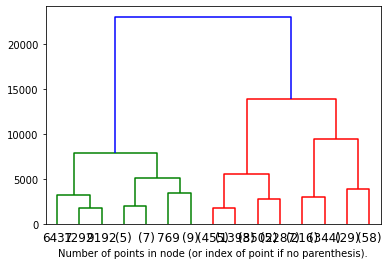

In [40]:
# code to write dendogram
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
      current_count = 0
      for child_idx in merge:
          if child_idx < n_samples:
              current_count += 1  # leaf node
          else:
              current_count += counts[child_idx - n_samples]
      counts[i] = current_count

  linkage_matrix = np.column_stack(
      [model.children_, model.distances_, counts]
  ).astype(float)

  # Plot the corresponding dendrogram
  dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(x_splitted)
#model = model.fit(X)
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## Divisive Clustering
Divisive clustering is very similar to agglomerative clustering except that The divisive clustering algorithm is a top-down clustering approach, whereas agglomerative is a bottom-top clustering.

# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


